In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [2]:
raw_data = pd.read_csv('dataset/Real-life-example.csv')

In [3]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
raw_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,4345,7,Volkswagen,936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,4173.0,NaN,NaN,NaN,19418.746935,25584.24262,600.0,6999.0,11500.0,21700.0,300000.0
Body,4345,6,sedan,1649,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,4345.0,NaN,NaN,NaN,161.237284,105.705797,0.0,86.0,155.0,230.0,980.0
EngineV,4195.0,NaN,NaN,NaN,2.790734,5.066437,0.6,1.8,2.2,3.0,99.99
Engine Type,4345,4,Diesel,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Registration,4345,2,yes,3947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,4345.0,NaN,NaN,NaN,2006.550058,6.719097,1969.0,2003.0,2008.0,2012.0,2016.0
Model,4345,312,E-Class,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = raw_data.copy()

In [6]:
df = df.drop('Model', axis=1)

In [7]:
df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
df = df.dropna(axis=0)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,4025.0,19552.308065,25815.734988,600.0,6999.0,11500.0,21900.0,300000.00
Mileage,4025.0,163.572174,103.394703,0.0,90.0,158.0,230.0,980.00
EngineV,4025.0,2.764586,4.935941,0.6,1.8,2.2,3.0,99.99
Year,4025.0,2006.379627,6.695595,1969.0,2003.0,2007.0,2012.0,2016.00


In [10]:
df.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_56052\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Mileage,EngineV,Year
Price,1.000000,-0.473523,0.058664,0.485734
Mileage,-0.473523,1.000000,0.024935,-0.664573
EngineV,0.058664,0.024935,1.000000,-0.030321
Year,0.485734,-0.664573,-0.030321,1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_56052\416640291.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis')


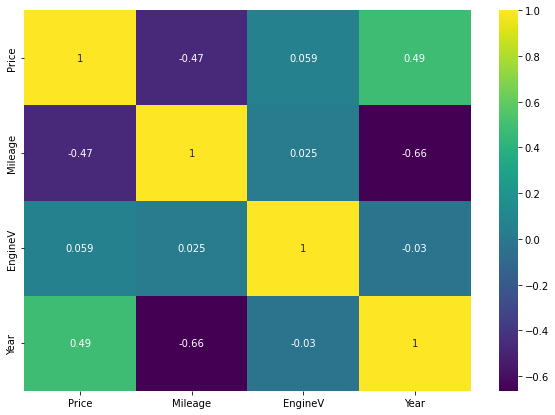

In [11]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

In [12]:
df = df.drop('Year', axis=1)

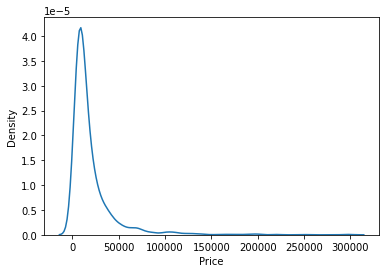

In [13]:
sns.kdeplot(df['Price'])
plt.show()

In [14]:
df = df[df['Price'] < df['Price'].quantile(0.99)]
df.count()

Brand           3984
Price           3984
Body            3984
Mileage         3984
EngineV         3984
Engine Type     3984
Registration    3984
dtype: int64

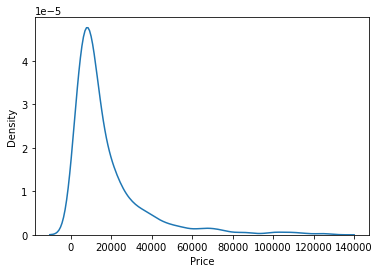

In [15]:
sns.kdeplot(df['Price'])
plt.show()

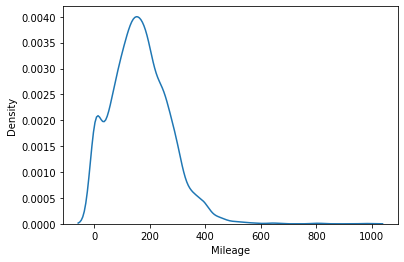

In [16]:
sns.kdeplot(df['Mileage'])
plt.show()

In [17]:
df = df[df['Mileage'] < df['Mileage'].quantile(0.99)]
df.count()

Brand           3944
Price           3944
Body            3944
Mileage         3944
EngineV         3944
Engine Type     3944
Registration    3944
dtype: int64

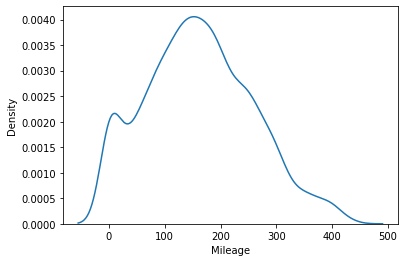

In [18]:
sns.kdeplot(df['Mileage'])
plt.show()

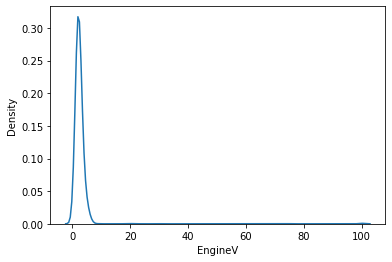

In [19]:
sns.kdeplot(df['EngineV'])
plt.show()

In [20]:
df = df[df['EngineV'] < df['EngineV'].quantile(0.99)]
df.count()

Brand           3894
Price           3894
Body            3894
Mileage         3894
EngineV         3894
Engine Type     3894
Registration    3894
dtype: int64

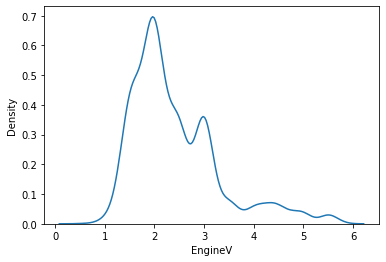

In [21]:
sns.kdeplot(df['EngineV'])
plt.show()

In [22]:
df = df.reset_index(drop=True)

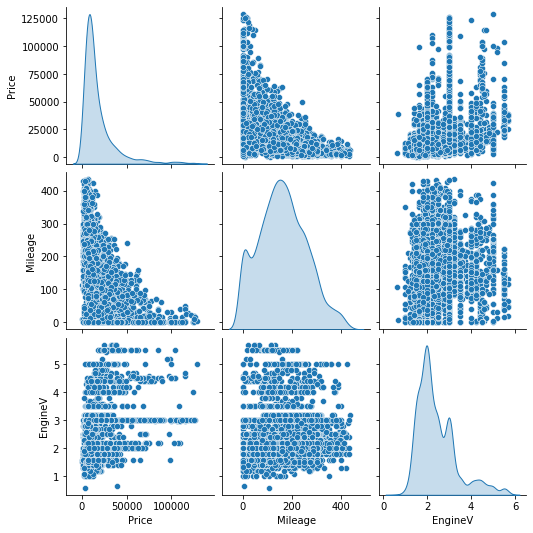

In [23]:
sns.pairplot(diag_kind='kde', data=df)
plt.show()

In [24]:
df['log_price'] = np.log(df['Price'])

<IPython.core.display.Javascript object>

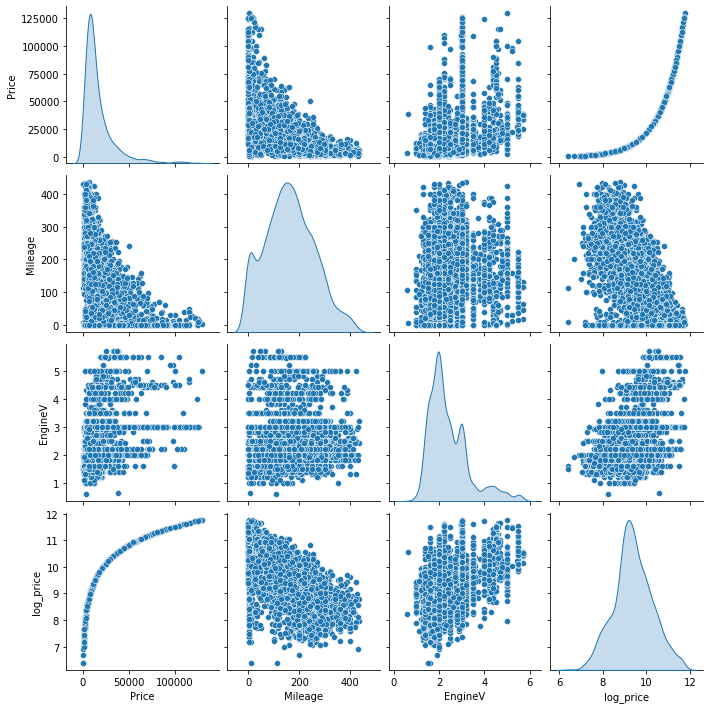

In [25]:
sns.pairplot(diag_kind='kde', data=df)
plt.show()

In [26]:
df = df.drop('Price', axis=1)

In [27]:
df = pd.get_dummies(df, drop_first=True)

In [28]:
y = df['log_price']
x = df.drop('log_price', axis=1)

In [29]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
print(len(xtrain), len(ytrain))
print(len(xtest), len(ytest))

3115 3115
779 779


In [32]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression()

In [33]:
yhat = reg.predict(xtrain)

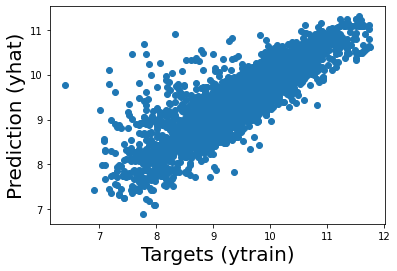

In [34]:
plt.scatter(ytrain, yhat)
plt.xlabel('Targets (ytrain)', fontsize=20)
plt.ylabel('Prediction (yhat)', fontsize=20)
plt.show()

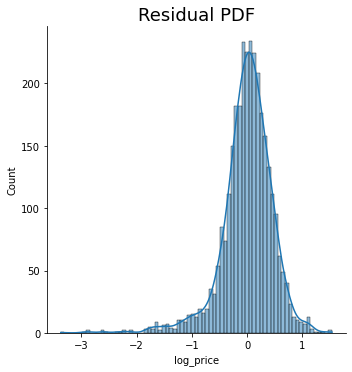

In [35]:
sns.displot(ytrain - yhat, kde=True)
plt.title('Residual PDF', size=18)
plt.show()

In [36]:
reg.score(xtrain, ytrain)

0.7329552383598519

In [37]:
reg.intercept_

9.286217805826794

In [38]:
reg.coef_

array([-0.00485742,  0.23772066,  0.07051643,  0.01839795, -0.49835712,
       -0.57223519, -0.1853886 , -0.23291788, -0.6197782 , -0.35093251,
       -0.4045641 , -0.42401284, -0.42410227, -0.33814097, -0.12979327,
       -0.31242955,  1.07988368])

In [39]:
reg_summary = pd.DataFrame(x.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.004857
1,EngineV,0.237721
2,Brand_BMW,0.070516
3,Brand_Mercedes-Benz,0.018398
4,Brand_Mitsubishi,-0.498357
5,Brand_Renault,-0.572235
6,Brand_Toyota,-0.185389
7,Brand_Volkswagen,-0.232918
8,Body_hatch,-0.619778
9,Body_other,-0.350933


In [40]:
y_hat_test = reg.predict(xtest)

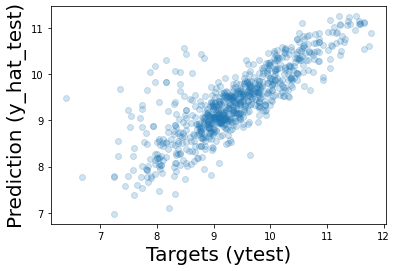

In [41]:
plt.scatter(ytest, y_hat_test, alpha=0.2)
plt.xlabel('Targets (ytest)', fontsize=20)
plt.ylabel('Prediction (y_hat_test)', fontsize=20)
plt.show()

In [42]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

<IPython.core.display.Javascript object>

,Prediction
0,11487.607328
1,16545.802613
2,4362.019515
3,8778.618182
4,8525.246330


In [43]:
df_pf['Target'] = np.exp(ytest)
df_pf

<IPython.core.display.Javascript object>

,Prediction,Target
0,11487.607328,4200.0
1,16545.802613,NaN
2,4362.019515,NaN
3,8778.618182,NaN
4,8525.246330,NaN
...,...,...
774,11770.281662,NaN
775,1609.278876,NaN
776,8393.326156,7500.0
777,9872.985937,NaN


In [44]:
ytest = ytest.reset_index(drop=True)

In [45]:
df_pf['Target'] = np.exp(ytest)
df_pf

<IPython.core.display.Javascript object>

,Prediction,Target
0,11487.607328,4000.0
1,16545.802613,32500.0
2,4362.019515,4300.0
3,8778.618182,8200.0
4,8525.246330,8000.0
...,...,...
774,11770.281662,12650.0
775,1609.278876,2000.0
776,8393.326156,8900.0
777,9872.985937,15000.0


In [46]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [47]:
df_pf['Difference%'] = np.absolute(df_pf['Residual'] / df_pf['Target'] * 100)

<IPython.core.display.Javascript object>

In [48]:
df_pf

,Prediction,Target,Residual,Difference%
0,11487.607328,4000.0,-7487.607328,187.190183
1,16545.802613,32500.0,15954.197387,49.089838
2,4362.019515,4300.0,-62.019515,1.442314
3,8778.618182,8200.0,-578.618182,7.056319
4,8525.246330,8000.0,-525.246330,6.565579
...,...,...,...,...
774,11770.281662,12650.0,879.718338,6.954295
775,1609.278876,2000.0,390.721124,19.536056
776,8393.326156,8900.0,506.673844,5.692965
777,9872.985937,15000.0,5127.014063,34.180094


In [49]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,779.000000,779.000000,779.000000,779.000000
mean,15887.669629,17508.553427,1620.883798,45.916608
std,13338.818977,18893.479632,10003.281337,114.900159
min,1069.152253,600.000000,-34262.718774,0.041785
25%,7543.216929,6950.000000,-2288.108715,11.684342
50%,11609.561844,11000.000000,214.656143,24.161343
75%,19017.302270,20950.000000,3228.899054,40.779808
max,76914.972636,129222.000000,84637.205813,2094.413555


In [50]:
pd.options.display.max_rows = 999
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
100,10604.429223,10600.00,-4.429223,0.041785
643,13585.462698,13600.00,14.537302,0.106892
698,8360.757494,8350.00,-10.757494,0.128832
544,10624.429574,10600.00,-24.429574,0.230468
199,6280.690094,6300.00,19.309906,0.306506
482,39875.653337,39999.00,123.346663,0.308374
139,35631.806610,35500.00,-131.806610,0.371286
380,10547.800161,10500.00,-47.800161,0.455240
716,8540.213138,8500.00,-40.213138,0.473096
194,10049.924365,10000.00,-49.924365,0.499244
